This page aims to find the best method for maximizing profit with our best model
That can be broken down as finding the best staking strategy
Some strategies include:

1) Betting the same amount of money on the model prediction for every single game
2) Betting the same amount of money on the model prediction for select games based on a formula (ev, others)
3) Changing the betting amount to win the same amount of money for each bet for every single game
4) Changing the betting amount to win the same amount of money for each bet for select games (ev, others)
5) Betting an amount of money that depends on a formula (kelly strategy) for every game
6) Betting an amount of money that depends on a formula (kelly strategy) for select games (ev, others)

We will have to test this on the 2022 season data
This means we will have to take the prediction of every game, the odds of every game, and the actual result of every game
That amounts to taking the gameID of the selected predictions, 'betting' a certain amount, and checking the result
One possibility is to put each of these in a dictionary
If the prediction is correct, calculate the amount won, if lost, then the amount will be the wager
Create in the df or a list the amount won/lost for each game, and display it visually

The data must take the following forms:
predictions = {GameID1: prediction, GameID2: prediction, GameID3: prediction,...}
results = {GameID1: result, GameID2: result, GameID3: result,...}
odds = {GameID1: odds, GameID2: odds, GameID3: odds,...}
wager = 0 implies betting varying amounts such that the payout is 100
wager = -1 implies betting varying amount depending on the kelly staking strategy that varies with bankroll

In [87]:
import matplotlib.pyplot as plt
from statistics import mean
import numpy as np
import itertools as itr

In [160]:
predictions = {'1HOUCHI': 0, '2HOUCHA': 0, '3CHICHA':1, '3CHILAL': 1}
odds = {'1HOUCHI': -200, '2HOUCHA': 100, '3CHICHA':250, '3CHILAL': 150}
results = {'1HOUCHI': 0, '2HOUCHA':1, '3CHICHA':1, '3CHILAL': 1}

In [ ]:
# this function will determine which games we should bet on based on implied odds


In [141]:
# this function will determine which games we should bet on based on expected value
def calculateEV(teamOdds, oppOdds, wager):
    
    if teamOdds < 0:
        teamImpliedProbability = abs(teamOdds)/(abs(teamOdds)+100)
        teamPayout = 100/abs(teamOdds)*wager
    else:
        teamImpliedProbability = 100/(teamOdds+100)
        teamPayout = teamOdds/100*wager
    
    if oppOdds < 0:
        oppImpliedProbability = abs(oppOdds)/(abs(oppOdds)+100)
    else:
        oppImpliedProbability = 100/(oppOdds+100)
        
    teamFairOdds = teamImpliedProbability/(teamImpliedProbability+oppImpliedProbability)
    teamEV = round((teamPayout*teamFairOdds) - (wager*(1-teamFairOdds)),2)
    
    return teamEV
calculateEV(-200, 150, 100)

-6.25

In [ ]:
def calculateEv(odds, wager):
    if odd<0:
        impliedProbability = abs(odd)/(abs(odd)+100)
        potentialWinnings = 10/abs(odd/100)
    else:
        impliedProbability = od/(odd+100)
        potentialWinnings = odd
    print(impliedProbability)
    
    

In [165]:
# function which will return a dictionary of dates as keys, and the total profits as values

def addValues(theDict, key, value):
    if key in theDict:
        if not isinstance(theDict[key], list):
            theDict[key] = [theDict[key]]
            theDict[key].append(value)
            
def getPayout(pr, re, odds, wager, addValues, bankroll=0):
    totalPayout = {}
    totalWager = []
    gameIds = list(pr.keys())    
    theWager=wager
    
    # looping through every gameId
    for i in pr:
        prediction = pr.get(i)
        result = re.get(i)
        odd = odds.get(i)
        
        # checks to see the type of wager we want to use
        if theWager == 0:
            if odd<0:
                wager = abs(odd)
            else:
                wager=(1000/odd)*10
        
        # this block will calculate wager if using kelly staking strategy based on bankroll input
        if theWager == -1:
            if odd<0:
                decimalOdds = (100/abs(odd))+1
                impliedProbability = abs(odd)/(abs(odd)+100)
                potentialWinnings = 100/abs(odd/100)/10
            else:
                decimalOdds = (odd/100)+1
                impliedProbability = 100/(odd+100)
                potentialWinnings = odd/10
            print(decimalOdds)
            percentBankroll = (decimalOdds*impliedProbability - (1-impliedProbability))/decimalOdds
            
            # this statement sets a cap on the % of bankroll
            #if percentBankroll > 0.05:
                #percentBankroll = 0.05
            wager = percentBankroll * bankroll
            
            print('Implied probability: ' + str(round(impliedProbability,4)))
            print('Potential winnings: ' + str(round(potentialWinnings, 4)))
            print('Percent bankroll: ' + str(round(percentBankroll,4)))
            print('Wager: ' + str(round(wager,4)))
            print('--------------------------------')
            
            
        totalWager.append(wager)
        # this statement calculates the payout based on wager
        if prediction == result:
            if odd < 0:
                payout = wager/abs(odd/100)
            else:
                payout = wager*(odd/100)
        else:
            payout = -1 * wager
            
        # this statement groups the profits by date into lists
        j=i[:-6]
        if j not in totalPayout:
            totalPayout.update({j:payout})
        else:
            addValues(totalPayout, j, payout)
            
    return [totalPayout, totalWager]

In [120]:
# function will create a line graph with per day profit and cumulative profit

def letsVisualize(getPayout, pr,re,odds,wager,addValues,bankroll=0):
    getPay = getPayout(pr,re,odds,wager,addValues,bankroll)
    theDict = getPay[0]
    totalWagers = getPay[1]
    date = list(pr.keys())
    sums = []
    sum2 = []
    profitPerGame = []
    dates = []
    
    # creating list of dates
    for i in date:
        j = i[:-6]
        dates.append(j)
    dates = np.unique(dates)
    
    # looping through dates and calculating sums
    for i in theDict:
        if type(theDict.get(i)) == list:
            sums.append(sum(theDict.get(i)))
            for i in theDict.get(i):
                profitPerGame.append(i)
        else:
            sums.append(theDict.get(i))
            profitPerGame.append(theDict.get(i))
    sum2 = list(itr.accumulate(sums, lambda a, b: a+b))
    
    # plotting the data
    plt.plot(dates,sums)
    plt.plot(dates,sum2)
    plt.title('Profit per day')
    plt.xlabel('Date')
    plt.ylabel('Profit')
    plt.legend(["per day", 'cumulative'], loc ="lower right")
    plt.show()
    
    totalProfit = round(sum2[-1],2)
    averageProfit = round(mean(profitPerGame),2)
    totalWager = round(sum(totalWagers),2)
    averageWager = round(mean(totalWagers),2)
    
    print('Your total profit is: $'+str(totalProfit))
    print('Your average profit per game is: $'+str(averageProfit))
    print('Your total wager is: $'+str(totalWager))
    print('Your average wager per game is: $'+str(averageWager))


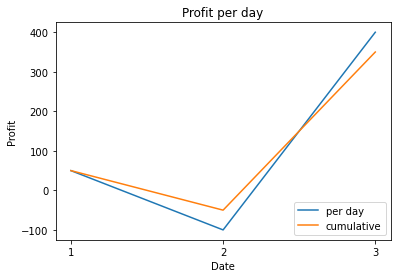

Your total profit is: $350.0
Your average profit per game is: $87.5
Your total wager is: $400
Your average wager per game is: $100


In [103]:
# STRATEGY 1
# Take the model predictions for every game in a given day and bet the same amount on each game
wager=100
letsVisualize(getPayout,predictions,results,odds,wager,addValues)

In [ ]:
# STRATEGY 2
# Take the model predictions for a select number of games in a given day and bet the same amount on each


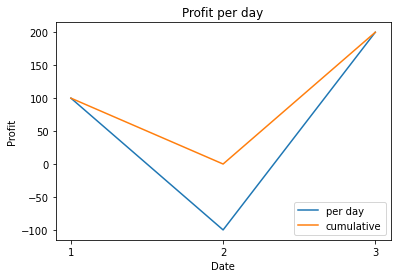

Your total profit is: $200.0
Your average profit per game is: $50.0
Your total wager is: $406.67
Your average wager per game is: $101.67


In [104]:
# STRATEGY 3
# This strategy will bet a varying amount on every game predicted such that the payout is $100
wager=0
letsVisualize(getPayout,predictions,results,odds,wager,addValues)

In [ ]:
# STRATEGY 4
# This strategy will bet a varying amount such that the payout is $100 for a select number of games


1.5
Implied probability: 0.6667
Potential winnings: 5.0
Percent bankroll: 0.4444
Wager: 444.4444
--------------------------------
2.0
Implied probability: 0.5
Potential winnings: 10.0
Percent bankroll: 0.25
Wager: 250.0
--------------------------------
3.5
Implied probability: 0.2857
Potential winnings: 25.0
Percent bankroll: 0.0816
Wager: 81.6327
--------------------------------
2.5
Implied probability: 0.4
Potential winnings: 15.0
Percent bankroll: 0.16
Wager: 160.0
--------------------------------


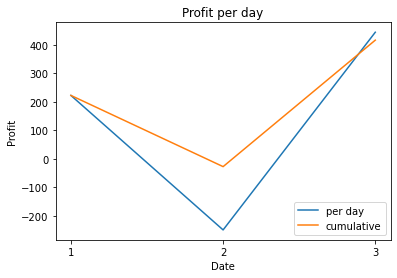

Your total profit is: $416.3
Your average profit per game is: $104.08
Your total wager is: $936.08
Your average wager per game is: $234.02


In [166]:
# STRATEGY 5
# This strategy will bet a varying amount depending on a formula for every game
wager=-1
letsVisualize(getPayout,predictions,results,odds,wager,addValues,1000)

In [ ]:
# STRATEGY 6
# This strategy will bet a varying amount depending on a formula for a select number of games
